In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import pandas as pd

df = pd.read_csv(
    'D:/twitter-sentiment-analysis/data/training.1600000.processed.noemoticon.csv',
    encoding='latin-1',   # or encoding='ISO-8859-1'
    header=None
)

df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df.head()



,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [16]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [17]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [18]:
df['target'].replace({0:'Negative',4:'Positive'},inplace=True)
df['target'].value_counts()

C:\Users\nisch\AppData\Local\Temp\ipykernel_13676\2809799396.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['target'].replace({0:'Negative',4:'Positive'},inplace=True)


target
Negative    800000
Positive    800000
Name: count, dtype: int64

In [22]:

df.head()

,target,text,text_length
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,Negative,is upset that he can't update his Facebook by ...,111
2,Negative,@Kenichan I dived many times for the ball. Man...,89
3,Negative,my whole body feels itchy and like its on fire,47
4,Negative,"@nationwideclass no, it's not behaving at all....",111


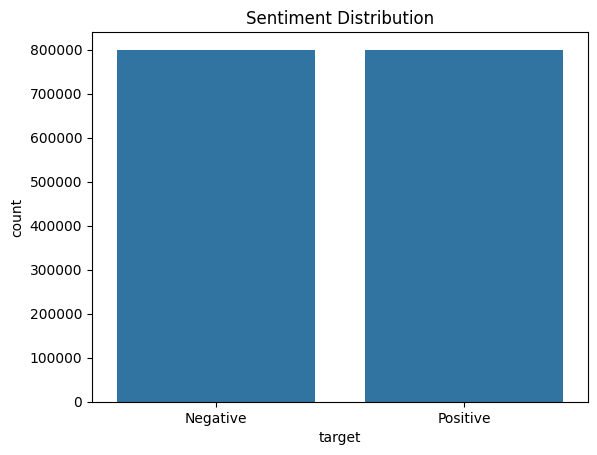

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Sentiment Distribution")
plt.show()


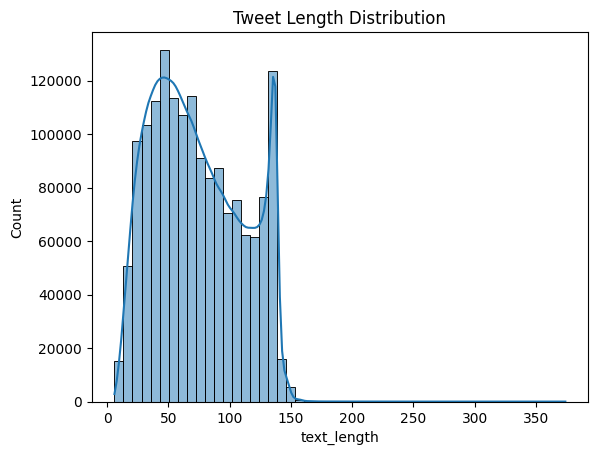

In [24]:
df['text_length'] = df['text'].apply(len)

# Length distribution plot
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Tweet Length Distribution")
plt.show()
